# Project: Optimising Profit Levels for Superstore

## Table of contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: A kaggle's sample superstore dataset, a kind of a simulation where you perform extensive data analysis to deliver insights on how the company can optimize its profit levels.

### Question(s) for Analysis
> How can Superstore increase its profits while minimizing the losses?

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='cleaning'></a>
## Data Cleaning

In [5]:
#Loading and preview of CSV file
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2.0,0.00,41.91
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3.0,0.00,219.58
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2.0,0.00,6.87
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.58,5.0,0.45,-383.03
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.37,2.0,0.20,2.52


In [6]:
#checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub_Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   float64
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1015.1+ KB


In [7]:
#checking for duplicated rows
sum(df.duplicated())

17

In [8]:
#drop duplicated rows
df.drop_duplicates(inplace=True)

In [9]:
#confirm there are no duplicated rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub_Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   float64
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.1+ MB


<a id= 'eda'></a>
## Exploratory Data Analysis 

In [10]:
#Get statistical summary to identify possible outliers
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000
mean,55154.964117,230.148924,3.790719,0.156278,28.690207
std,32058.266816,623.721439,2.226657,0.206455,234.457935
min,1040.000000,0.440000,1.000000,0.000000,-6599.980000
25%,23223.000000,17.300000,2.000000,0.000000,1.730000
50%,55901.000000,54.820000,3.000000,0.200000,8.670000
75%,90008.000000,209.970000,5.000000,0.200000,29.370000
max,99301.000000,22638.480000,14.000000,0.800000,8399.980000


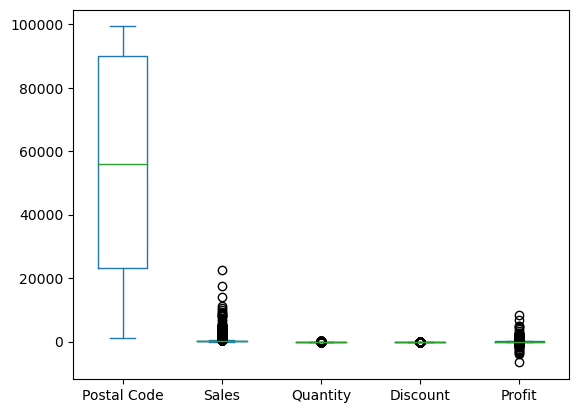

In [137]:
df.plot.box()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4308\1435177719.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


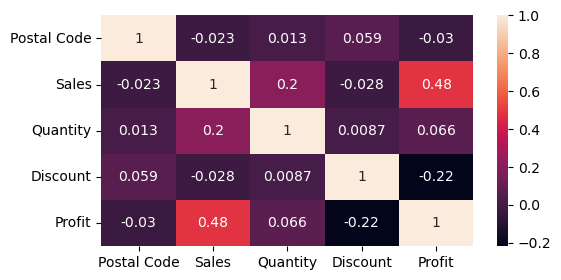

In [90]:
#Finding correlation levels between possible 'causative' factors
import seaborn as sns
plt.figure(figsize=(6,3)) 
corr = df.corr() 
heatmap = sns.heatmap(corr, annot=True)

> There is a correlation between Sales and Profit. It is also important for us to consider Quantity considering its correlation level with Sales. Therefore, the basis of comparing other factors will be based on Sales, Quantity and Profit.

In [98]:
#Understanding Categories and Sub_Categories
pd.DataFrame(df.groupby(['Category','Sub_Category'])[['Sales','Profit']].sum())

Sales    Profit
Category        Sub_Category                     
Furniture       Bookcases     114880.05  -3472.56
                Chairs        327777.79  26567.11
                Furnishings    91682.98  13052.83
                Tables        206965.68 -17725.59
Office Supplies Appliances    107532.14  18138.07
                Art            27107.04   6524.78
                Binders       203409.21  30227.88
                Envelopes      16476.38   6964.10
                Fasteners       3024.25    949.53
                Labels         12444.90   5526.31
                Paper          78224.18  33944.02
                Storage       223843.59  21279.05
                Supplies       46673.52  -1188.99
Technology      Accessories   167380.31  41936.78
                Copiers       149528.01  55617.90
                Machines      189238.68   3384.73
                Phones        330007.10  44516.25

In [12]:
#Which category has the most sales and profitability?
df1=pd.DataFrame(df.groupby(['Category'])[['Sales', 'Quantity', 'Profit']].sum())
df1

,Sales,Quantity,Profit
Category,,,
Furniture,741306.50,8020.0,18421.79
Office Supplies,718735.21,22861.0,122364.75
Technology,836154.10,6939.0,145455.66


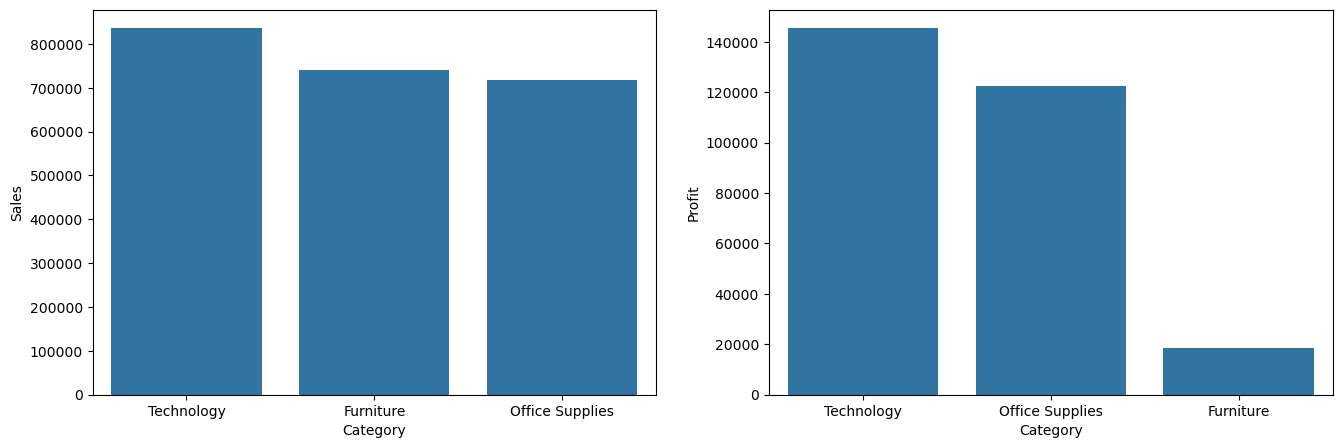

In [53]:
plt.figure(figsize = [16, 5])
base_color = sns.color_palette()[0]

plt.subplot(1, 2, 1)
freq=df1.sort_values(by='Sales', ascending=False)
sales_order=freq.index
sns.barplot(x=df1.index, y=df1.Sales, color=base_color, ci=None, order=sales_order);


plt.subplot(1, 2, 2)
freq=df1.sort_values(by='Profit', ascending=False)
profit_order=freq.index
sns.barplot(x=df1.index, y=df1.Profit, color=base_color, ci=None, order=profit_order);


> Technology is seen as the category with the most Sales and Profit. On the basis of profit only(since this is the focal point), we see how Office Supplies tops Furniture.

In [96]:
#What are the best selling and most profitable sub_categories?
df2=pd.DataFrame(df.groupby(['Sub_Category'])[['Sales','Profit']].sum())
df2

,Sales,Profit
Sub_Category,,
Accessories,167380.31,41936.78
Appliances,107532.14,18138.07
Art,27107.04,6524.78
Binders,203409.21,30227.88
Bookcases,114880.05,-3472.56
Chairs,327777.79,26567.11
Copiers,149528.01,55617.90
Envelopes,16476.38,6964.10
Fasteners,3024.25,949.53


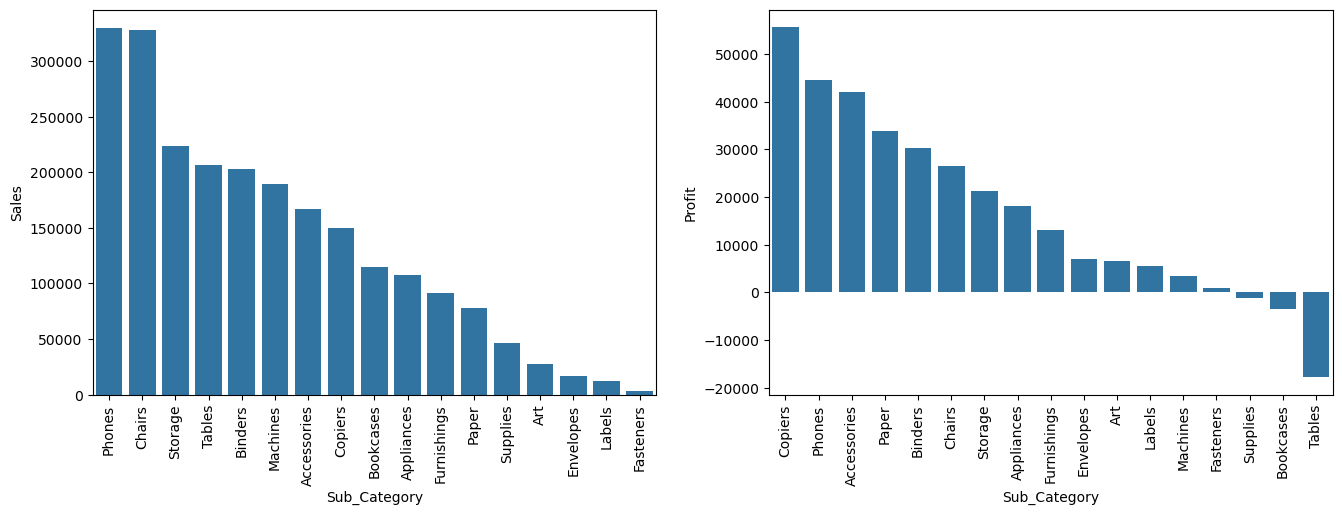

In [97]:
plt.figure(figsize=[16,5])

plt.subplot(1,2,1)
freq=df2.sort_values(by='Sales', ascending=False)
sales_order=freq.index
sns.barplot(x=df2.index, y=df2.Sales, color=base_color, ci=None, order=sales_order)
plt.xticks(rotation=90);

plt.subplot(1,2,2)
freq=df2.sort_values(by='Profit', ascending=False)
profit_order=freq.index
sns.barplot(x=df2.index, y=df2.Profit, color=base_color, ci=None, order=profit_order)
plt.xticks(rotation=90);

> Major profit shifts occurred for sub_categories like Copiers(Tech), Accessories(Tech) and Paper(Supplies) considering their level of sales. It will be interesting to see the spread of the sales/profit for these sub_categories among regions/cities. 

> Tables is the worst performing sub_category in profit terms. This is quite alarming considering its sales level come at 4th position.  It may be worth considering either to discontinue its sale or focus on key regions/cities that can help rake in whatever profit there are.

In [16]:
#What is the quantity sold for each sub_category?
df3=pd.DataFrame(df.groupby(['Sub_Category'])['Quantity'].sum())
df3

,Quantity
Sub_Category,
Accessories,2976.0
Appliances,1729.0
Art,2996.0
Binders,5971.0
Bookcases,868.0
Chairs,2351.0
Copiers,234.0
Envelopes,906.0
Fasteners,914.0


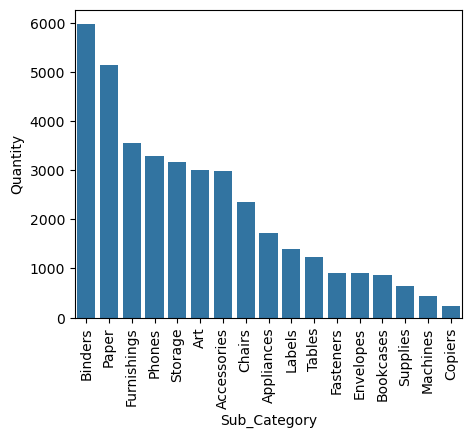

In [79]:
plt.figure(figsize=[5,4])
freq=df3.sort_values(by='Quantity', ascending=False)
sales_order=freq.index
sns.barplot(x=df3.index, y=df3.Quantity, ci=None, order=sales_order, color=base_color)
plt.xticks(rotation=90);

> Considering the first 6 items on the Quantity vs Sales, we can deduce that the average prices for Binders, Papers and Furnishing and Art are relatively lower than Phones and Storage.

In [121]:
#Which is the biggest ship mode and customer segment?
df4=pd.DataFrame(df.groupby(['Segment','Ship Mode'])['Profit'].count())
df4=df4.sort_values(by='Profit', ascending=False)
df4=df4.reset_index()
df4

,Segment,Ship Mode,Profit
0,Consumer,Standard Class,3079
1,Corporate,Standard Class,1808
2,Home Office,Standard Class,1068
3,Consumer,Second Class,1019
4,Consumer,First Class,768
5,Corporate,Second Class,608
6,Corporate,First Class,485
7,Consumer,Same Day,317
8,Home Office,Second Class,316
9,Home Office,First Class,284


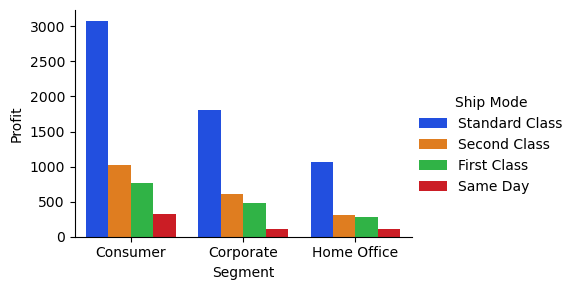

In [122]:
g = sns.catplot(x='Segment', y='Profit', data=df4, palette='bright',height=3, aspect=1.5,kind='bar',hue='Ship Mode');

> The biggest customer segment is the 'Consumer'. Across all segments, we see a huge preference for the 'Standard Class' ship mode. There is a low preference for Same Day ship mode which means that the company should focus on promoting the 'top 3' ship modes during order.

In [19]:
#The most profitable region
df5=pd.DataFrame(df.groupby(['Region'])[['Sales', 'Profit']].sum())
df5.sort_values(by='Profit', ascending=False)

,Sales,Profit
Region,,
West,725255.74,108330.15
East,678435.32,91506.37
South,391721.90,46749.71
Central,500782.85,39655.97


> The most profitable regions are the West and East. A deep-dive into the various regions and sub_categories' performance(sales, quantity and profit) will help us to understand where the business should focus on in order to optimize its profit levels.

In [84]:
#Region breakdown by sub_categories in sales, profit and quantity
df6=pd.DataFrame(df.groupby(['Region', 'Sub_Category'])[['Sales', 'Quantity','Profit']].sum())
df6.sort_values(by='Sales', ascending=False)
df6 = df6.reset_index()
df6

,Region,Sub_Category,Sales,Quantity,Profit
0,Central,Accessories,33956.08,716.0,7251.67
1,Central,Appliances,23581.98,470.0,-2638.61
2,Central,Art,5765.32,678.0,1195.15
3,Central,Binders,56919.70,1470.0,-1037.47
4,Central,Bookcases,24157.16,192.0,-1997.92
...,...,...,...,...,...
63,West,Paper,26536.84,1681.0,12059.93
64,West,Phones,98684.39,1068.0,9111.06
65,West,Storage,70532.84,1039.0,8645.49
66,West,Supplies,18127.12,238.0,626.11


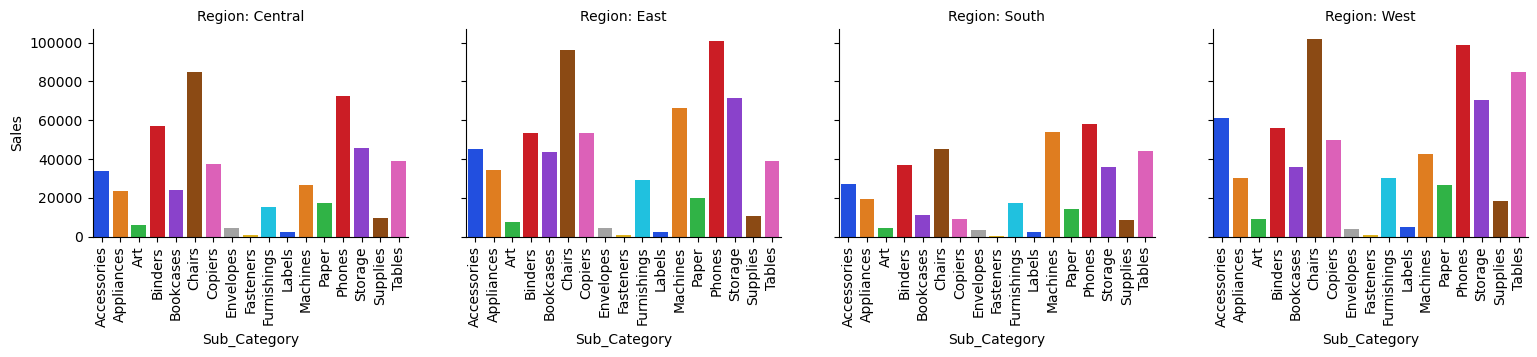

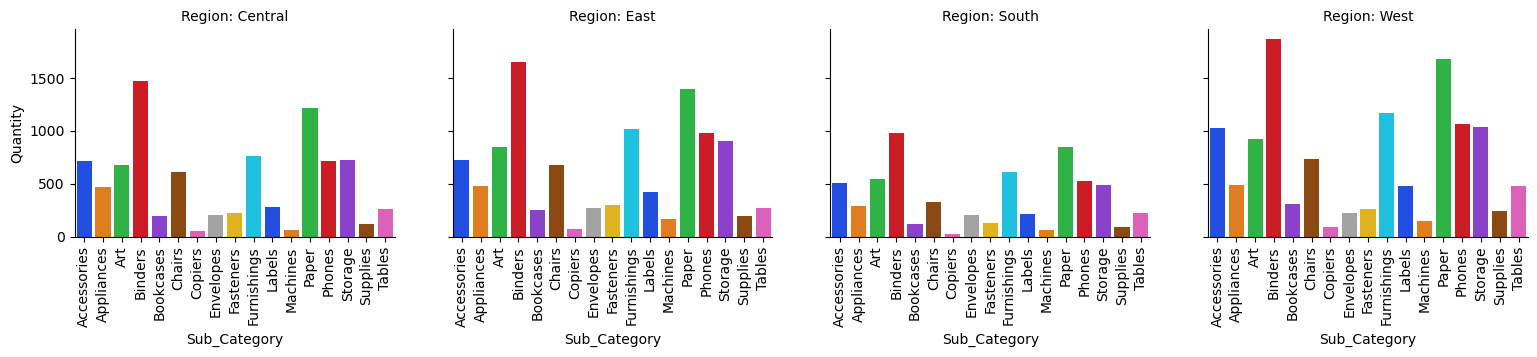

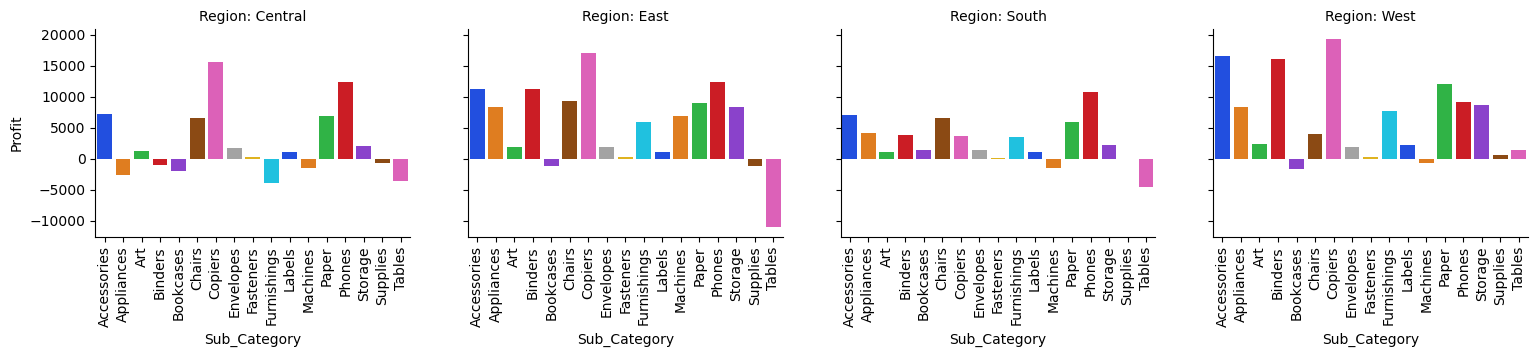

In [134]:
g = sns.catplot(x='Sub_Category', y='Sales', data=df6,palette='bright',height=3, aspect=1.3,kind='bar', col ='Region', col_wrap=4)
g.set_titles('Region: {col_name}')
g.set_xticklabels(rotation=90);

g = sns.catplot(x='Sub_Category', y='Quantity', data=df6,palette='bright',height=3, aspect=1.3,kind='bar', col ='Region', col_wrap=4)
g.set_titles('Region: {col_name}')
g.set_xticklabels(rotation=90);

g = sns.catplot(x='Sub_Category', y='Profit', data=df6,palette='bright',height=3, aspect=1.3,kind='bar', col ='Region', col_wrap=4)
g.set_titles('Region: {col_name}')
g.set_xticklabels(rotation=90);

> Knowing that the biggest regions are the East and West, we see that the top 4 most sold sub_categories are sitting in these regions- Phones, Chairs, Storage and Tables. Since Phones, Chairs and Storage makes it to the top list of profitable sub_categories and we have established a high correlation between Sales and Profit, Superstore should consider sales promotional strategies to boost its sales for these sub_categories in these 2 regions in order to optimize its profit levels. This does not mean losing sight of other regions e.g the Central which is big on its sales of Chairs and Phones for instance.

> Machines are a big deal in the East and the profit level is best in class. The business should focus and push sale for this sub_category in this region.

> Tables have been highlighted as being the biggest loss to the business as a whole however, we see a ray of hope for this sub_category in the West.

> The business needs to sell more of its Accessories, Copiers and Binders across all regions. The profit levels are good enough except for Binders in the Central region.

> The South is the weakest link of all regions however, the region has its strength playing to the Phone and Storage sub_categories.

> The business should continue selling paper as the profit margins are good when compared to other sub_categories.

In [123]:
#What Cities to focus on in top regions
df7=pd.DataFrame(df.groupby(['Region','City', 'Sub_Category'])[['Sales','Quantity','Profit']].sum())
df7=df7.sort_values(by='Profit', ascending=False)
df7=df7.reset_index()
df7.head(30)

,Region,City,Sub_Category,Sales,Quantity,Profit
0,East,New York City,Machines,37531.21,54.0,14568.83
1,East,New York City,Phones,37959.13,319.0,10765.53
2,Central,Lafayette,Copiers,17499.95,5.0,8399.98
3,East,New York City,Binders,24567.69,562.0,8372.93
4,West,Seattle,Copiers,17449.88,12.0,8290.45
5,East,New York City,Chairs,40149.66,265.0,6187.07
6,Central,Detroit,Binders,12489.18,99.0,6154.98
7,West,Seattle,Binders,17700.15,329.0,5904.31
8,East,New York City,Copiers,16719.84,18.0,5749.96
9,West,Los Angeles,Accessories,18463.05,236.0,5667.28


> The above accounts for about 52% of the total profit made by the business as such, it is a good inference point on what cities(and respective sub_categories) to focus on for which regions.

> East- New York City(Machines, Phones, Chairs, Storage, Accessories, Copiers and Binders), Newark and Providence(Copiers)

> West- Seattle and Los Angeles (Copiers, Binders, Accessories and Storage), Seattle(Tables)

> Central- Lafayette and Springfield(Copiers), Detroit(Chairs and Binders), Minneapolis and Jackson (Binders)

> South- Atlanta(Binders)

In [72]:
df8=pd.DataFrame(df.groupby(['Region','City'])[['Sales','Quantity','Profit']].sum())
df8=df8.sort_values(by='Profit', ascending=False)
df8=df8.reset_index()
df8.head(30)
top10 = df8[:10]
top10

,Region,City,Sales,Quantity,Profit
0,East,New York City,256319.00,3413.0,62013.99
1,West,Los Angeles,175831.89,2876.0,30431.61
2,West,Seattle,119460.28,1578.0,29121.72
3,West,San Francisco,112577.17,1920.0,17466.12
4,Central,Detroit,42056.97,438.0,13146.69
5,Central,Lafayette,19630.45,43.0,8976.10
6,South,Atlanta,17197.84,156.0,6993.69
7,Central,Minneapolis,16870.54,80.0,6824.61
8,West,San Diego,47521.05,670.0,6377.24
9,East,Newark,28576.15,362.0,5793.77


> The above accounts for about 65% of the total profit the business made. It will be worthy of note in cases whereby the business may want to explore a region and focus on key cities where it gains its most profit. e.g For this business, New York and Newark is key to the Eastern region

In [73]:
least10 = df8[-10:]
least10

,Region,City,Sales,Quantity,Profit
573,South,Jacksonville,44713.18,429.0,-2323.80
574,West,Phoenix,11000.27,224.0,-2790.85
575,Central,Dallas,20131.90,555.0,-2846.55
576,West,Louisville,5070.41,90.0,-3406.18
577,South,Burlington,12681.28,46.0,-5894.53
578,Central,Chicago,48536.03,1129.0,-6648.31
579,Central,San Antonio,21843.54,247.0,-7299.06
580,East,Lancaster,9414.03,156.0,-7318.52
581,Central,Houston,64441.21,1460.0,-10175.10
582,East,Philadelphia,109061.54,1978.0,-13843.27


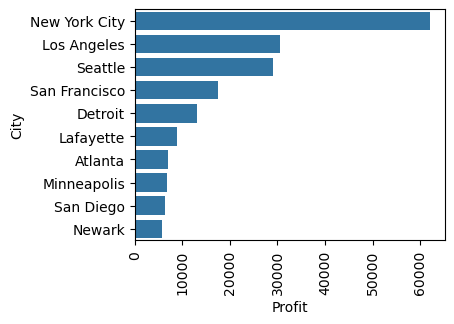

In [136]:
plt.figure(figsize=[4,3])
sns.barplot(data=top10, x='Profit', y='City', ci=None, color=base_color)
plt.xticks(rotation=90);

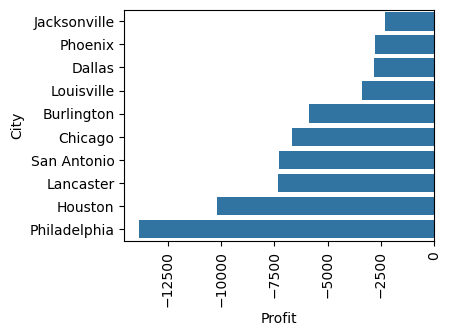

In [135]:
plt.figure(figsize=[4,3])
sns.barplot(data=least10, x='Profit', y='City', ci=None, color=base_color)
plt.xticks(rotation=90);

<a id='conclusions'></a>
## Conclusions

> **1. The dataset was helpful enough to understand how the business can optimize its profit levels.**

> **2. It was very clear from the analysis above that sales level is correlated with profit levels. Discount was not correlated with sales.**

> **3. In order to optimize its profit, the business will have to focus on improving its sales of Paper, Accessories, Copiers and Binders across all regions.**

> **4. 'Laser focus' on key sub_categories already doing well in each region/city to rake in all the possible profits. That way the business does not spread its cost of sales too thin.** 
>> **East- New York City(Machines, Phones, Chairs, Storage), Newark and Providence**

>> **West- Seattle and Los Angeles (Storage), Seattle(Tables)**

>> **Central- Lafayette and Springfield, Detroit(Chairs), Minneapolis and Jackson**

>> **South- Atlanta**

> **5. Sub-categories like Table should focus only on the West like Seattle. The business may be able to sustain/better its profit levels for Tables if it focuses on this region and may take out the discounts- build organic sales(demand) for tables to see how that will impact profit levels. In the long run, how these factors play out will determine whether or not to keep selling the Tables sub_category or discontinue it as a whole.**

>**6. For sub_categories like 'Supplies' where sales level are not too low but has a 'slightly negative' profit level, the business can explore taking out discounts and maintaining sales levels. The idea is that the business should be able to achieve break-even in the long run once the discounts are factored back into the profit.** 